<a href="https://colab.research.google.com/github/Jenet-Shirely/Neural-networks-and-Deep-learning/blob/main/Lab5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/dataset_Code.zip'
extract_dir = 'dataset_extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted to {extract_dir}")


Extracted to dataset_extracted


In [ ]:
import os
import glob

image_extensions = ['*.jpg', '*.jpeg', '*.png']

image_paths = []
for ext in image_extensions:
    image_paths.extend(glob.glob(os.path.join(extract_dir, '**', ext), recursive=True))

keywords = ['Shirely', 'Sangu']

labels = []
for path in image_paths:
    filename = os.path.basename(path).lower()
    matched = False
    for keyword in keywords:
        if keyword.lower() in filename:
            labels.append(keyword.capitalize())
            matched = True
            break
    if not matched:
        labels.append('unknown')

# Output summary
print(f"Total images: {len(image_paths)}")
print(f"Label breakdown: { {label: labels.count(label) for label in set(labels)} }")

Total images: 280
Label breakdown: {'Sangu': 85, 'Shirely': 195}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images(paths, size=(64, 64)):
    images = []
    for p in paths:
        img = load_img(p, target_size=size)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

le = LabelEncoder()
encoded_labels = le.fit_transform(labels)


train_paths, test_paths, y_train, y_test = train_test_split(
    image_paths, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42)

X_train = load_images(train_paths)
X_test = load_images(test_paths)

print("Image arrays loaded:", X_train.shape, X_test.shape)


Image arrays loaded: (224, 64, 64, 3) (56, 64, 64, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.6071 - loss: 0.6921 - val_accuracy: 0.6444 - val_loss: 0.6239
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.7121 - loss: 0.5633 - val_accuracy: 0.6444 - val_loss: 0.6097
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.7128 - loss: 0.5360 - val_accuracy: 0.6444 - val_loss: 0.5568
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.7335 - loss: 0.4627 - val_accuracy: 0.6444 - val_loss: 0.5132
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.8150 - loss: 0.4177 - val_accuracy: 0.7111 - val_loss: 0.4730
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.8958 - loss: 0.3594 - val_accuracy: 0.6444 - val_loss: 0.5165
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.8565 - loss: 0.3719 - val_accuracy: 0.8000 - val_loss: 0.3978
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9498 - loss: 0.2510 - val_accuracy: 0.8000 - val_loss: 0.3655
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9077 - loss: 0.2175
Test Accuracy: 0.89
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


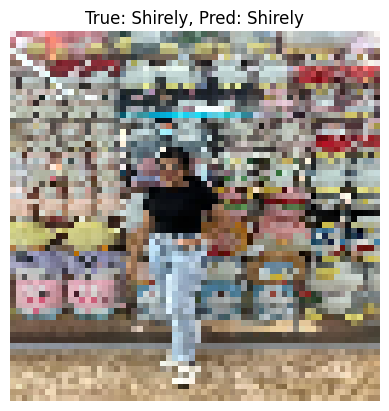

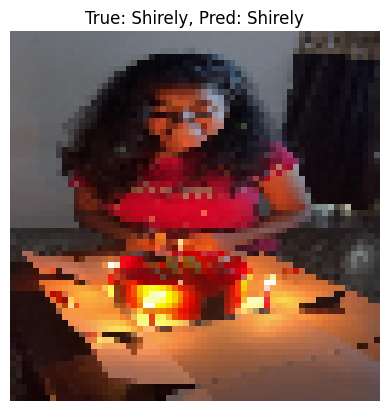

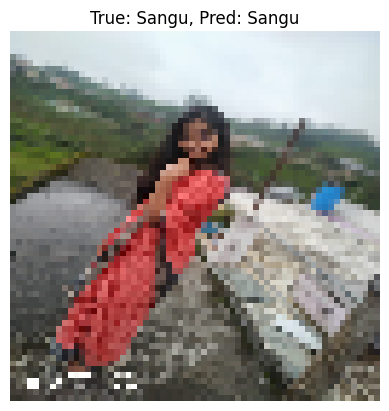

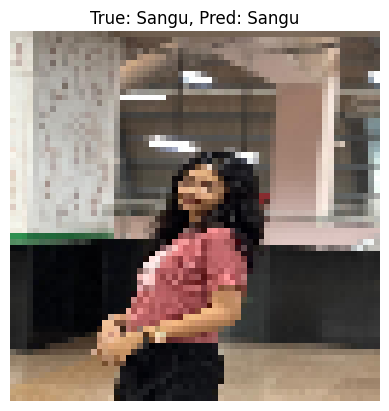

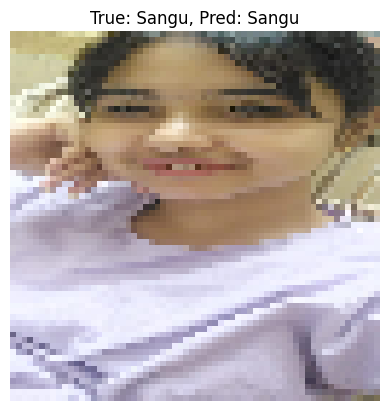

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

# Predict
import matplotlib.pyplot as plt

preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)

# Show predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"True: {le.inverse_transform([y_test[i]])[0]}, Pred: {le.inverse_transform([pred_labels[i]])[0]}")
    plt.axis('off')
    plt.show()
